In [0]:
import keras,os
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten # import Dense(output), flatten & other req layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model # import models
from keras.applications.vgg16 import VGG16 # import vgg 16 from keras application
from keras.applications.vgg16 import preprocess_input # to preprocess the input images
from keras.preprocessing import image
from keras.models import Sequential # we are creating  sequential model and vgg itself is a sequential model
from glob import glob
import matplotlib.pyplot as plt # to plot the parameters
%matplotlib inline

In [16]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train",target_size=(224,224))
#training path
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/test", target_size=(224,224))
# Test path

Found 5380 images belonging to 32 classes.
Found 1369 images belonging to 32 classes.


In [0]:
IMAGE_SIZE = [224, 224] # input image size is 224,224 in vgg16

In [0]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 
# here we initialising vgg 16 model and removing the last layer because we have 32 categories
# Input shape will me 224,224 plus the no channels which is 3(RGB),wights will provided from imagenet already present in keras

In [0]:
for layer in vgg.layers:
  layer.trainable = False
  # we are not training th existing vgg 16 layer because it is alreaady trained, weights are fixed.

In [0]:
folders = glob('/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/*')
#  In order to add the last layer we will be uing glob function to see the categoris present in the train set

In [21]:
print(folders) # printing the categories

['/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Cabbage', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Cauliflower', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Broccoli', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Chilli peppers', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Celeriac', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Carrots', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Capsicums', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Celery', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Kale and Cavolo Nero', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Ginger', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Chokos', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Fennel', '/content/drive/My Drive/Big_data_sem2/Output_4/Output_4/train/Garlic', '/content/drive/My Drive/Bi

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output) # flatten the last layer
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x) # appending the folders as a dense layer with softmx as the
# activation function

In [0]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# convert it into model where vgg.input and output 

In [24]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping # fit the model
checkpoint = ModelCheckpoint("/content/drive/My Drive/Big_data_sem2/model/vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=20,callbacks=[checkpoint,early])

Epoch 1/20
10/10 [==============================] - 357s 36s/step - loss: 31.0109 - accuracy: 0.1969 - val_loss: 25.3386 - val_accuracy: 0.4187
Epoch 2/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/10 [==============================] - 320s 32s/step - loss: 16.9455 - accuracy: 0.5063 - val_loss: 15.5750 - val_accuracy: 0.5969
Epoch 3/20
10/10 [==============================] - 323s 32s/step - loss: 11.8750 - accuracy: 0.6406 - val_loss: 2.3897 - val_accuracy: 0.7688
Epoch 4/20
10/10 [==============================] - 319s 32s/step - loss: 7.2639 - accuracy: 0.7594 - val_loss: 11.1376 - val_accuracy: 0.8062
Epoch 5/20
10/10 [==============================] - 302s 30s/step - loss: 5.4949 - accuracy: 0.8322 - val_loss: 7.7093 - val_accuracy: 0.8594
Epoch 6/20
10/10 [==============================] - 321s 32s/step - loss: 3.2037 - accuracy: 0.8562 - val_loss: 4.6179 - val_accuracy: 0.8344
Epoch 7/20
10/10 [==============================] - 316s 32s/step - loss: 3.3111 - accuracy: 0.8938 - val_loss: 4.1073 - val_accuracy: 0.8844
Epoch 8/20
10/10 [==============================] - 325s 32s/step - loss: 2.4044 - accuracy: 0.9125 - val_loss: 1.5457 - val_accuracy: 0.9000
Epoch 9/20
10

In [0]:
import tensorflow as tf 

from keras.models import load_model

model.save('veg_classification_vgg_model.h5') # saving the model 

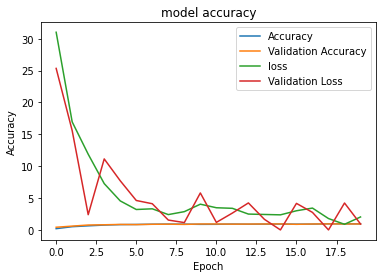

In [14]:
# plotting the accurcy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()